In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


###Load Dataset

In [2]:
data = pd.read_csv("Employee_Salary_Dataset.csv")

###Data Exploration and Preprocessing

Encode gender to numeric

In [4]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [5]:
X = data[['Experience_Years', 'Age', 'Gender']]
y = data['Salary']

###Split Data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)

In [11]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

MSE: 2658843406389.606
RMSE: 1630596.0279571412
R² Score: -185.89116595002594


###Plot Regression Line (Experience_Years vs Salary)

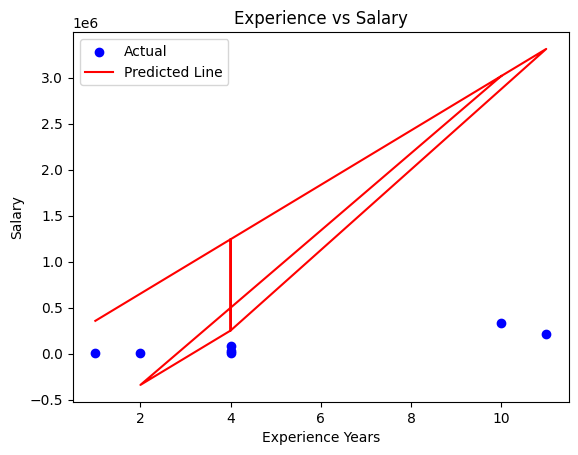

In [12]:
plt.scatter(X_test['Experience_Years'], y_test, color='blue', label="Actual")
plt.plot(X_test['Experience_Years'], model.predict(X_test), color='red', label="Predicted Line")
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.title('Experience vs Salary')
plt.legend()
plt.show()

###Plot Residuals

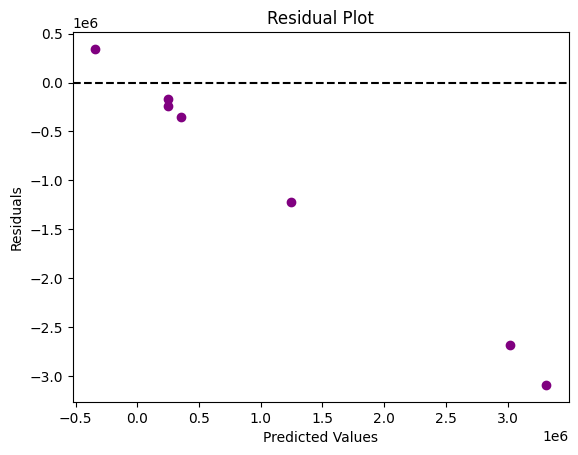

In [13]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()